In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib import rc
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

In [2]:
def label(df, t=15):
#     df = df[df.shape[0] % t:]
    df2 = df.groupby(np.arange(len(df))//t, axis=0).agg({'Timestamp': 'min', 'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last',
                                'N/A': 'sum', 'Timestamp End': 'max', 'N/A.1': 'sum', 'N/A.2': 'sum', 'N/A.3': 'sum',
                                'N/A.4': 'sum', 'N/A.5': 'sum', 'Time_UTC_Start': 'first'})
    df2.rename(columns = {'N/A': 'Volumn', 'N/A.1': 'Quote_asset_volume', 'N/A.2': 'Number_of_trades',
                         'N/A.3': 'Taker_buy_base_asset_volume', 'N/A.4': 'Taker_buy_quote_asset_volume'}, inplace = True)
    length = df2.shape[0]
    op = df2['Open'].values.reshape(length,1)
    cl = df2['Close'].values.reshape(length,1 )
    v = np.ones((length, 1)) * (op < cl)
    df2['label'] = v
    df2.index = df2["Timestamp"]
    df2.drop(columns=["Timestamp", "N/A.5"], inplace=True)
    return df2

In [3]:
df = pd.read_csv('../binance-BTCUSDT-1m.csv')

In [4]:
df = df.iloc[26:]
df = label(df, t=60)

In [5]:
df

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Timestamp,,,,,,,,,,,,
1531911600000,7403.62,7433.58,7388.97,7419.00,1509.897532,1531915199999,1.119392e+07,9140,858.531816,6.365466e+06,2018-07-18 11:00:00,1.0
1531915200000,7418.02,7472.02,7406.23,7435.89,2149.661062,1531918799999,1.600977e+07,11665,1215.708096,9.052893e+06,2018-07-18 12:00:00,1.0
1531918800000,7435.90,7469.37,7386.12,7457.01,2197.764754,1531922399999,1.633053e+07,12232,1095.080446,8.138991e+06,2018-07-18 13:00:00,1.0
1531922400000,7458.14,7531.30,7431.66,7453.00,3276.014892,1531925999999,2.446673e+07,17154,1741.566330,1.300958e+07,2018-07-18 14:00:00,0.0
1531926000000,7451.71,7453.01,7360.40,7428.73,2447.162973,1531929599999,1.813955e+07,13956,1175.701436,8.715964e+06,2018-07-18 15:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1651892400000,35953.63,35959.99,35760.00,35812.21,950.370320,1651895999999,3.407918e+07,23893,440.466220,1.579364e+07,2022-05-07 03:00:00,0.0
1651896000000,35812.22,35882.67,35725.72,35746.63,1038.354640,1651899599999,3.717972e+07,25448,505.470370,1.809844e+07,2022-05-07 04:00:00,0.0
1651899600000,35746.62,35900.00,35722.24,35898.95,897.235930,1651903199999,3.215497e+07,22906,428.196080,1.534393e+07,2022-05-07 05:00:00,1.0


In [6]:
df.index = pd.to_datetime(df['Time_UTC_Start'])

In [7]:
df.head()

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Time_UTC_Start,,,,,,,,,,,,
2018-07-18 11:00:00,7403.62,7433.58,7388.97,7419.00,1509.897532,1531915199999,1.119392e+07,9140,858.531816,6.365466e+06,2018-07-18 11:00:00,1.0
2018-07-18 12:00:00,7418.02,7472.02,7406.23,7435.89,2149.661062,1531918799999,1.600977e+07,11665,1215.708096,9.052893e+06,2018-07-18 12:00:00,1.0
2018-07-18 13:00:00,7435.90,7469.37,7386.12,7457.01,2197.764754,1531922399999,1.633053e+07,12232,1095.080446,8.138991e+06,2018-07-18 13:00:00,1.0
2018-07-18 14:00:00,7458.14,7531.30,7431.66,7453.00,3276.014892,1531925999999,2.446673e+07,17154,1741.566330,1.300958e+07,2018-07-18 14:00:00,0.0
2018-07-18 15:00:00,7451.71,7453.01,7360.40,7428.73,2447.162973,1531929599999,1.813955e+07,13956,1175.701436,8.715964e+06,2018-07-18 15:00:00,0.0


In [29]:
df1 = df.asfreq('3D')

In [51]:
df1 = df1.fillna(method = "ffill")

In [7]:
decomp = seasonal_decompose(x=df1.Close, model='additive')

In [8]:
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

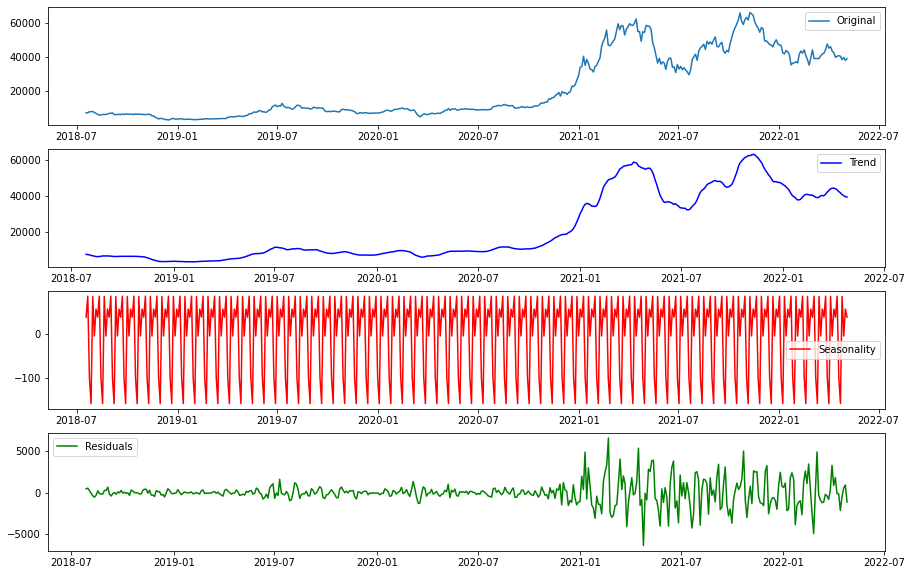

In [9]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df1.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  2.,  2.,  0.,  1.,
         3.,  6.,  2.,  7.,  3., 10., 12., 13., 20., 28., 67., 99., 66.,
        31., 14., 11., 11.,  5.,  6.,  3.,  2.,  9.,  1.,  3.,  5.,  0.,
         3.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-6389.73046696, -6129.71335268, -5869.69623839, -5609.6791241 ,
        -5349.66200982, -5089.64489553, -4829.62778125, -4569.61066696,
        -4309.59355268, -4049.57643839, -3789.5593241 , -3529.54220982,
        -3269.52509553, -3009.50798125, -2749.49086696, -2489.47375268,
        -2229.45663839, -1969.4395241 , -1709.42240982, -1449.40529553,
        -1189.38818125,  -929.37106696,  -669.35395268,  -409.33683839,
         -149.3197241 ,   110.69739018,   370.71450447,   630.73161875,
          890.74873304,  1150.76584732,  1410.78296161,  1670.8000759 ,
         1930.81719018,  2190.83430447,  2450.85141875,  2710.86853304,
         2970.88564732,  3230.90276161,  3490.9198759 ,  3750.936990

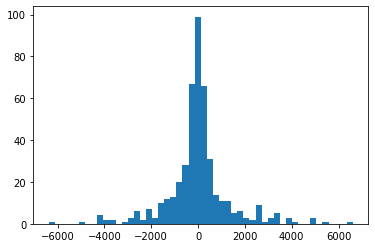

In [18]:
plt.hist(decomp.resid, bins = 50)

In [19]:
df2 = df.asfreq('7D')
df2 = df2.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df2.Close, model='additive')
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

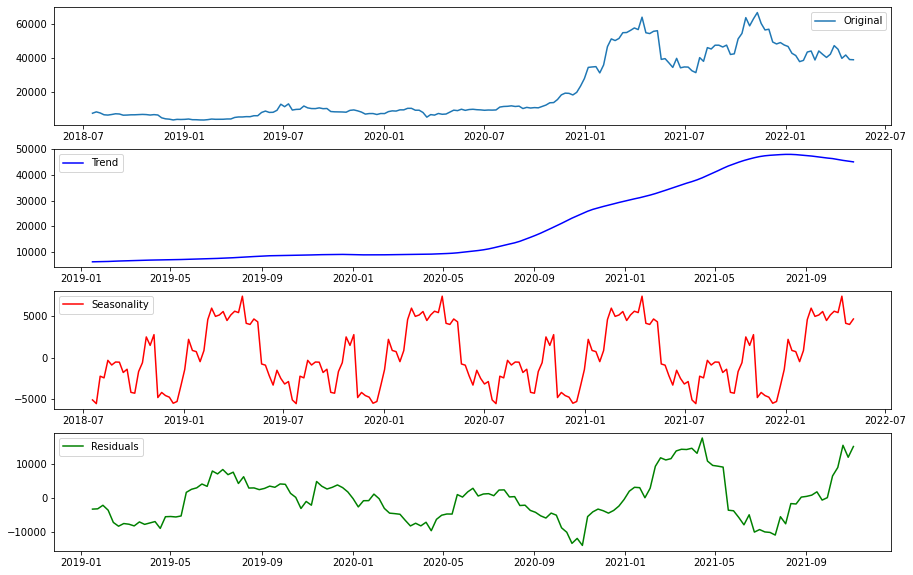

In [20]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df2.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

In [21]:
test = est_trend + est_seasonal + est_residual

In [159]:
df3

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Time_UTC_Start,,,,,,,,,,,,
2018-07-18 11:00:00,7403.62,7419.09,7388.97,7395.00,350.486570,1.531912e+12,2.595325e+06,2722.0,182.772603,1.353409e+06,2018-07-18 11:00:00,0.0
2018-07-18 12:00:00,7418.02,7443.48,7406.23,7434.94,472.655514,1.531916e+12,3.511303e+06,2668.0,305.565355,2.270214e+06,2018-07-18 12:00:00,1.0
2018-07-18 13:00:00,7435.90,7455.00,7431.00,7447.36,318.003735,1.531920e+12,2.366800e+06,2344.0,185.403578,1.379857e+06,2018-07-18 13:00:00,1.0
2018-07-18 14:00:00,7458.14,7503.00,7442.00,7474.02,887.934189,1.531923e+12,6.632493e+06,4904.0,523.771292,3.912241e+06,2018-07-18 14:00:00,1.0
2018-07-18 15:00:00,7451.71,7453.01,7388.00,7420.00,893.283325,1.531927e+12,6.623929e+06,4312.0,394.389752,2.924306e+06,2018-07-18 15:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35907.29,35910.98,139.770940,1.651893e+12,5.021981e+06,4610.0,63.466740,2.280306e+06,2022-05-07 03:00:00,0.0
2022-05-07 04:00:00,35812.22,35854.10,35766.00,35799.99,200.578770,1.651897e+12,7.183003e+06,6111.0,88.698540,3.176351e+06,2022-05-07 04:00:00,0.0
2022-05-07 05:00:00,35746.62,35827.08,35722.24,35812.61,207.000310,1.651900e+12,7.406700e+06,6078.0,112.947320,4.041060e+06,2022-05-07 05:00:00,1.0


In [8]:
df3 = df.asfreq('3600s')
df3 = df3.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df3.Close, model='additive', two_sided=False)
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

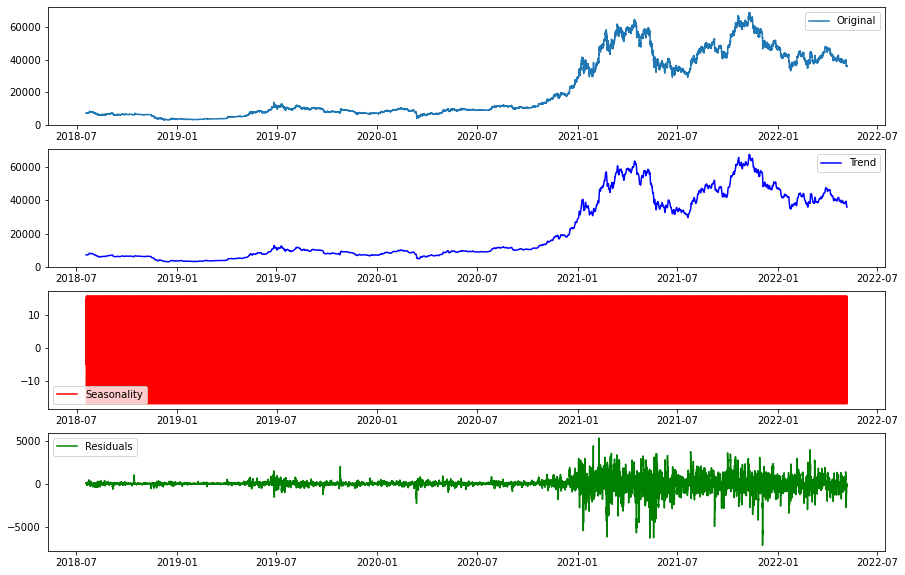

In [9]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df3.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

In [10]:
est_residual.iloc[22440:22500]

Time_UTC_Start
2021-02-07 11:00:00    -525.746247
2021-02-07 12:00:00    -709.686524
2021-02-07 13:00:00    -862.593891
2021-02-07 14:00:00   -1187.181699
2021-02-07 15:00:00   -1381.563600
2021-02-07 16:00:00   -1008.778081
2021-02-07 17:00:00   -1219.629841
2021-02-07 18:00:00    -755.615614
2021-02-07 19:00:00    -858.860537
2021-02-07 20:00:00    -356.944298
2021-02-07 21:00:00    -247.637099
2021-02-07 22:00:00      73.498155
2021-02-07 23:00:00     109.177061
2021-02-08 00:00:00      58.447953
2021-02-08 01:00:00    -127.037004
2021-02-08 02:00:00    -369.283078
2021-02-08 03:00:00    -504.475114
2021-02-08 04:00:00      17.886179
2021-02-08 05:00:00      99.833990
2021-02-08 06:00:00     415.265053
2021-02-08 07:00:00     652.555926
2021-02-08 08:00:00     558.914093
2021-02-08 09:00:00     361.380052
2021-02-08 10:00:00     832.537081
2021-02-08 11:00:00     826.876461
2021-02-08 12:00:00    4288.516809
2021-02-08 13:00:00    4010.813401
2021-02-08 14:00:00    4487.818093
2021-

In [11]:
est_residual.dropna(inplace=True)

In [12]:
residual = est_residual
for x in range(len(est_residual)):
    if (est_residual[x] <= 647.7449929678342 * 5) and (est_residual[x] >= -647.7449929678342 * 5):
        continue
    else:
        print(x)
        residual[x] = residual[x-1]

21760
21761
21762
21763
21764
21770
21772
21773
22197
22198
22199
22200
22201
22202
22441
22442
22443
22444
22445
22446
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22778
22782
22794
22795
22796
22797
22798
22799
22800
22803
22805
22806
22807
22808
22866
22868
22993
23241
23278
24088
24089
24090
24091
24092
24093
24094
24095
24096
24207
24209
24210
24211
24212
24213
24214
24684
24685
24686
24687
24688
24689
24690
24693
24694
24695
24777
24784
24785
24831
24833
24834
24835
24841
24842
24843
24844
24892
24896
24897
24934
24938
24941
24942
24943
24961
24968
25449
26462
26463
26464
26466
27507
27508
27509
27510
27511
27512
27513
27514
27515
28079
28080
28204
29176
29422
29423
29424
29425
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
30760
31691
31692
31693
31694


In [13]:
residual[22440:22460]

Time_UTC_Start
2021-02-08 11:00:00     826.876461
2021-02-08 12:00:00     826.876461
2021-02-08 13:00:00     826.876461
2021-02-08 14:00:00     826.876461
2021-02-08 15:00:00     826.876461
2021-02-08 16:00:00     826.876461
2021-02-08 17:00:00     826.876461
2021-02-08 18:00:00    2734.370636
2021-02-08 19:00:00    2915.288421
2021-02-08 20:00:00    2915.288421
2021-02-08 21:00:00    2915.288421
2021-02-08 22:00:00    2915.288421
2021-02-08 23:00:00    2915.288421
2021-02-09 00:00:00    2915.288421
2021-02-09 01:00:00    2915.288421
2021-02-09 02:00:00    2915.288421
2021-02-09 03:00:00    2915.288421
2021-02-09 04:00:00    2915.288421
2021-02-09 05:00:00    2915.288421
2021-02-09 06:00:00    2915.288421
Freq: 3600S, Name: resid, dtype: float64

(array([4.6000e+01, 3.3000e+01, 2.7000e+01, 4.1000e+01, 3.8000e+01,
        3.5000e+01, 3.0000e+01, 5.9000e+01, 7.5000e+01, 6.3000e+01,
        7.5000e+01, 8.9000e+01, 9.8000e+01, 1.4000e+02, 1.7200e+02,
        1.9400e+02, 2.6100e+02, 2.8400e+02, 3.1200e+02, 3.9600e+02,
        5.7500e+02, 7.6700e+02, 1.2210e+03, 2.1470e+03, 6.7860e+03,
        1.0484e+04, 2.9890e+03, 1.4280e+03, 8.6200e+02, 6.4900e+02,
        5.2900e+02, 4.3700e+02, 3.6800e+02, 2.8700e+02, 2.3200e+02,
        1.7400e+02, 1.6600e+02, 1.4000e+02, 1.2800e+02, 9.1000e+01,
        5.6000e+01, 5.7000e+01, 5.9000e+01, 4.2000e+01, 3.1000e+01,
        4.1000e+01, 4.6000e+01, 2.9000e+01, 8.0000e+00, 1.2000e+01]),
 array([-3237.36323933, -3108.39841738, -2979.43359542, -2850.46877347,
        -2721.50395151, -2592.53912955, -2463.5743076 , -2334.60948564,
        -2205.64466368, -2076.67984173, -1947.71501977, -1818.75019782,
        -1689.78537586, -1560.8205539 , -1431.85573195, -1302.89090999,
        -1173.92608804, -1044.

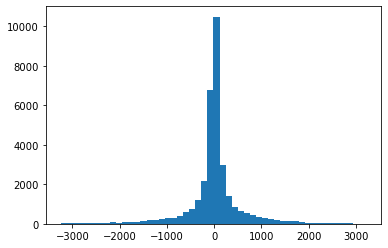

In [14]:
plt.hist(residual, bins=50)

In [15]:
residual

Time_UTC_Start
2018-07-19 11:00:00     42.202086
2018-07-19 12:00:00     52.010143
2018-07-19 13:00:00     97.514026
2018-07-19 14:00:00     84.932676
2018-07-19 15:00:00     10.571817
                          ...    
2022-05-07 03:00:00   -257.705323
2022-05-07 04:00:00   -291.965904
2022-05-07 05:00:00   -114.437468
2022-05-07 06:00:00   -188.298905
2022-05-07 07:00:00    -26.506574
Freq: 3600S, Name: resid, Length: 33309, dtype: float64

In [19]:
residual + t

Time_UTC_Start
2018-07-19 11:00:00     7414.49
2018-07-19 12:00:00     7428.83
2018-07-19 13:00:00     7489.98
2018-07-19 14:00:00     7462.65
2018-07-19 15:00:00     7392.35
                         ...   
2022-05-07 03:00:00    35812.21
2022-05-07 04:00:00    35746.63
2022-05-07 05:00:00    35898.95
2022-05-07 06:00:00    35806.27
2022-05-07 07:00:00    35951.69
Freq: 3600S, Length: 33309, dtype: float64

In [20]:
df3['Close'][24:]

Time_UTC_Start
2018-07-19 11:00:00     7414.49
2018-07-19 12:00:00     7428.83
2018-07-19 13:00:00     7489.98
2018-07-19 14:00:00     7462.65
2018-07-19 15:00:00     7392.35
                         ...   
2022-05-07 03:00:00    35812.21
2022-05-07 04:00:00    35746.63
2022-05-07 05:00:00    35898.95
2022-05-07 06:00:00    35806.27
2022-05-07 07:00:00    35951.69
Freq: 3600S, Name: Close, Length: 33309, dtype: float64

In [21]:
df

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Time_UTC_Start,,,,,,,,,,,,
2018-07-18 11:00:00,7403.62,7419.09,7388.97,7395.00,350.486570,1531912499999,2.595325e+06,2722,182.772603,1.353409e+06,2018-07-18 11:00:00,0.0
2018-07-18 11:15:00,7395.00,7413.67,7390.00,7409.00,297.425016,1531913399999,2.201984e+06,1852,157.429353,1.165518e+06,2018-07-18 11:15:00,1.0
2018-07-18 11:30:00,7408.99,7433.58,7403.21,7423.04,394.702440,1531914299999,2.930376e+06,2489,240.866650,1.788280e+06,2018-07-18 11:30:00,1.0
2018-07-18 11:45:00,7420.24,7425.15,7408.07,7419.00,467.283506,1531915199999,3.466240e+06,2077,277.463210,2.058258e+06,2018-07-18 11:45:00,0.0
2018-07-18 12:00:00,7418.02,7443.48,7406.23,7434.94,472.655514,1531916099999,3.511303e+06,2668,305.565355,2.270214e+06,2018-07-18 12:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 06:45:00,35853.44,35878.00,35790.02,35806.27,221.581020,1651906799999,7.940182e+06,6791,90.621670,3.246592e+06,2022-05-07 06:45:00,0.0
2022-05-07 07:00:00,35806.28,35832.12,35800.00,35810.01,543.906800,1651907699999,1.947352e+07,6514,138.951090,4.975453e+06,2022-05-07 07:00:00,1.0
2022-05-07 07:15:00,35810.01,35870.00,35810.00,35835.31,246.015180,1651908599999,8.819353e+06,5945,133.953740,4.802037e+06,2022-05-07 07:15:00,1.0


In [21]:
pd.DataFrame(residual).to_csv('./residual.csv', index=True)

In [22]:
t = (est_seasonal + est_trend).dropna()

In [23]:
pd.DataFrame(t, columns=['price']).to_csv('./trend_and_seasonal.csv', index=True)

In [24]:
pd.read_csv('./residual.csv')

,Time_UTC_Start,resid
0,2018-07-19 11:00:00,42.202086
1,2018-07-19 12:00:00,52.010143
2,2018-07-19 13:00:00,97.514026
3,2018-07-19 14:00:00,84.932676
4,2018-07-19 15:00:00,10.571817
...,...,...
33304,2022-05-07 03:00:00,-257.705323
33305,2022-05-07 04:00:00,-291.965904
33306,2022-05-07 05:00:00,-114.437468
33307,2022-05-07 06:00:00,-188.298905


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10304\3854046937.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.ravel(x).astype(np.float)


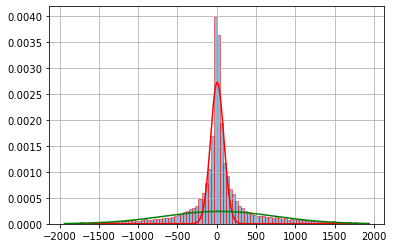

In [22]:
x = residual.to_numpy()

f = np.ravel(x).astype(np.float)
f=f.reshape(-1,1)
g = mixture.GaussianMixture(n_components=2, covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_
plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
# plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

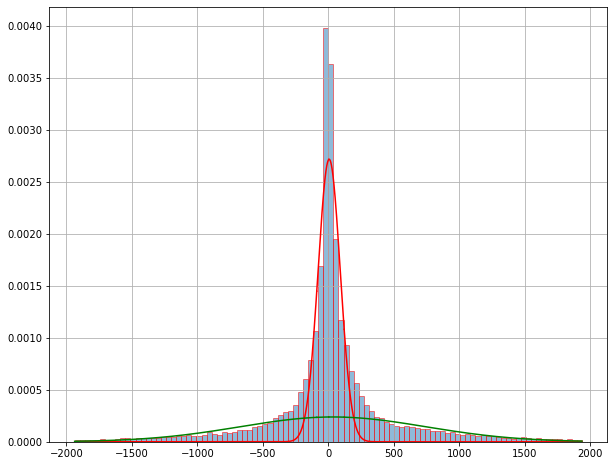

In [23]:
plt.figure(figsize=(10,8))
plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [24]:
weights

array([0.57523546, 0.42476454])

In [25]:
means

array([[ 6.40523785],
       [35.37301244]])

In [29]:
math.sqrt(covars[0]), math.sqrt(covars[1])

(84.41193243399599, 709.0106777045302)

In [53]:
random_1 = np.random.normal(6.40523785, 84.41193243399599, size=len(est_residual))
random_2 = np.random.normal(35.37301244, 709.0106777045302, size=len(est_residual))
random = random_1.tolist() + random_2.tolist()
weight_random = [0.57523546] * len(est_residual) + [0.42476454] * len(est_residual)

[]

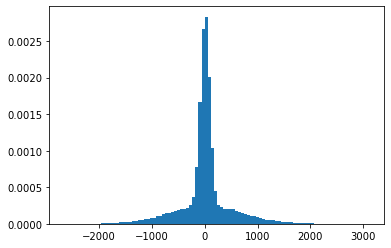

In [54]:
plt.hist(random, weights=weight_random, bins=100, histtype='bar',density=True)
plt.plot()

[]

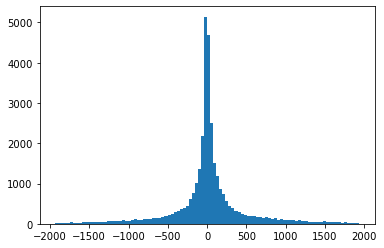

In [46]:
plt.hist(residual, bins=100)
plt.plot()

In [55]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(est_seasonal.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -21586489906160.691406
p-value: 0.000000


In [41]:
0.0004728373669439642**1/2

0.0002364186834719821

In [35]:
est_residual.mean()

1.0006932457951414

In [61]:
data = (est_seasonal + est_trend).dropna()

In [62]:
data

Time_UTC_Start
2018-07-19 10:39:00     7369.600747
2018-07-19 11:39:00     7365.312224
2018-07-19 12:39:00     7369.067980
2018-07-19 13:39:00     7389.943591
2018-07-19 14:39:00     7377.053406
                           ...     
2022-05-07 03:39:00    36064.844066
2022-05-07 04:39:00    36039.711329
2022-05-07 05:39:00    36017.114902
2022-05-07 06:39:00    35996.475333
2022-05-07 07:39:00    35977.091807
Freq: 3600S, Length: 33310, dtype: float64

In [63]:
data = data - data.shift(1)

In [64]:
old_data = df3.Close - df3.Close.shift(1)

In [65]:
((data[1:] * old_data[1:]) >= 0).sum()/len(data[1:])

0.5251733765648924

In [66]:
data =(data[1:] >= 0) * 1

In [67]:
data = pd.DataFrame(data, columns={'label'})

In [68]:
data.to_csv('./new_label.csv', index=True)

In [69]:
data

,label
Time_UTC_Start,
2018-07-19 11:39:00,0
2018-07-19 12:39:00,1
2018-07-19 13:39:00,1
2018-07-19 14:39:00,0
2018-07-19 15:39:00,0
...,...
2022-05-07 03:39:00,0
2022-05-07 04:39:00,0
2022-05-07 05:39:00,0


In [56]:
est_residual_ = pd.DataFrame(est_residual)

In [58]:
est_residual_.to_csv('./residual.csv', index=True)

In [59]:
est_residual_

,resid
Time_UTC_Start,
2018-07-18 10:39:00,NaN
2018-07-18 11:39:00,NaN
2018-07-18 12:39:00,NaN
2018-07-18 13:39:00,NaN
2018-07-18 14:39:00,NaN
...,...
2022-05-07 03:39:00,-175.444066
2022-05-07 04:39:00,-220.661329
2022-05-07 05:39:00,-158.834902


In [78]:
S = df['Close']

In [79]:
R = S / S.shift(1) - 1

In [80]:
R.dropna(inplace=True)

(array([3.00000e+00, 1.10000e+01, 6.51000e+02, 1.32492e+05, 1.68000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-0.1322372 , -0.09313428, -0.05403136, -0.01492844,  0.02417448,
         0.0632774 ,  0.10238032,  0.14148324,  0.18058616,  0.21968908,
         0.258792  ]),
 <BarContainer object of 10 artists>)

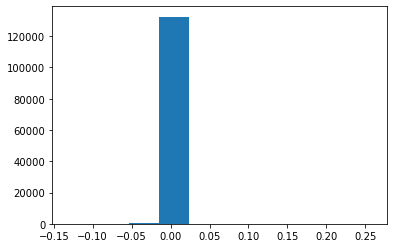

In [81]:
plt.hist(R)

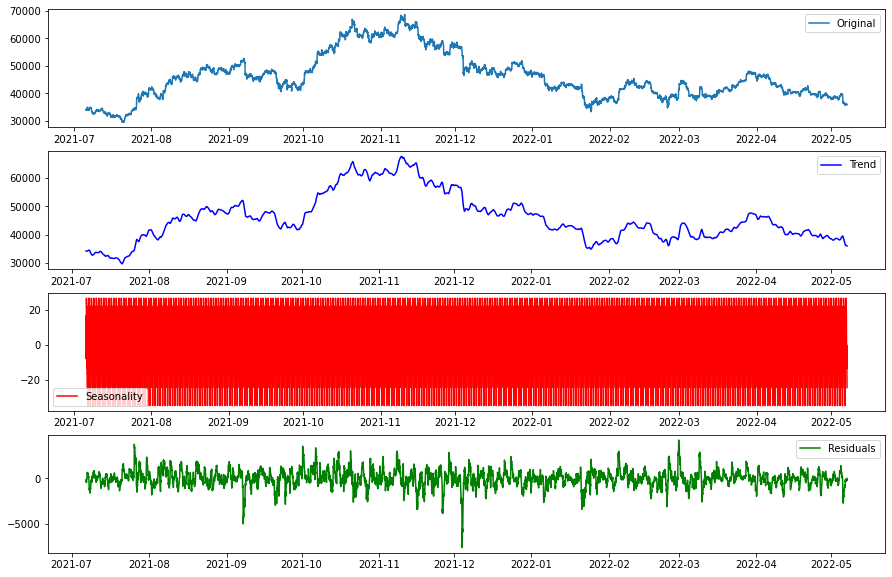

In [53]:
df3 = df.asfreq('3600s')[26000:]
df3 = df3.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df3.Close, model='additive', two_sided=False)
est_trend = decomp2.trend
est_seasonal_1 = decomp2.seasonal
est_residual_1 = decomp2.resid
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df3.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal_1, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual_1, label='Residuals',color='g')
axes[3].legend()

In [19]:
est_residual_1.mean()/est_residual_1.std(), est_residual_2.mean()/est_residual_2.std()

(0.016508565233164692, 0.035673268202052195)

In [104]:
r = (est_residual_1 - est_residual_1.shift(1))/est_residual_1.shift(1)
r = r.dropna()

In [105]:
r.mean()

1.048746199479332

In [106]:
r.std()

113.02488476044316

In [114]:
residual = ((r <= 113.02488476044316 * 3) * (r >= -113.02488476044316 * 3) * r).fillna(method='ffill')

In [115]:
residual.mean()

-0.1070964827618288

In [116]:
residual.std()

6.935863849179044

In [87]:
mu = 2.3183698389629275e-5
sigma = 0.0031928444133398548
start_price = 7000

In [98]:
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=1000000)
price = start_price*(1+returns).cumprod()

In [99]:
returns

array([ 0.00565553,  0.00130082,  0.00314814, ..., -0.00252242,
        0.00281614,  0.00440323])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4884\323819230.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.ravel(x).astype(np.float)


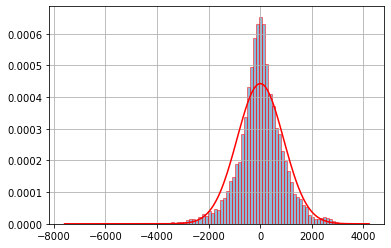

In [121]:
x = est_residual_1.dropna().to_numpy()

f = np.ravel(x).astype(np.float)
f=f.reshape(-1,1)
g = mixture.GaussianMixture(n_components=1, covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_
plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
# plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
# plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

<AxesSubplot:>

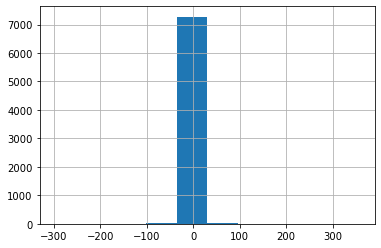

In [113]:
residual.hist()